Практическим проектом нашего курса будет анализ активности студентов онлайн курса Введение в анализ данных в R, спасибо команде stepik, что предоставили анонимизированные данные.

В этом модуле, мы разберемся с задачей, начнем исследовать данные, а об условиях соревнований, призах и тайных стэпах раскажу во втором модуле!

Описание данных:

events_train.csv - данные о действиях, которые совершают студенты со стэпами
https://stepik.org/media/attachments/course/4852/event_data_train.zip

step_id - id стэпа
user_id - анонимизированный id юзера
timestamp - время наступления события в формате unix date
action - событие, возможные значения: 
discovered - пользователь перешел на стэп
viewed - просмотр шага,
started_attempt - начало попытки решить шаг, ранее нужно было явно нажать на кнопку - начать решение, перед тем как приступить к решению практического шага
passed - удачное решение практического шага


submissions_train.csv - данные о времени и статусах сабмитов к практическим заданиям
https://stepik.org/media/attachments/course/4852/submissions_data_train.zip

step_id - id стэпа
timestamp - время отправки решения в формате unix date
submission_status - статус решения
user_id - анонимизированный id юзера

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
event_data = pd.read_csv('event_data_train.csv')

In [4]:
event_data.shape

(3480703, 4)

In [5]:
event_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [6]:
event_data['date'] = pd.to_datetime(event_data.timestamp, unit='s')
event_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [7]:
event_data['day'] = event_data.date.dt.date
#event_data['date'].apply(lambda x: print('x'))
event_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [8]:
event_data.user_id.nunique()

19234

In [20]:
event_data.groupby('day').user_id.nunique().head()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

In [25]:
# date on X axis at plot below do not overlap
sns.set(rc={'figure.figsize': (9,6)})

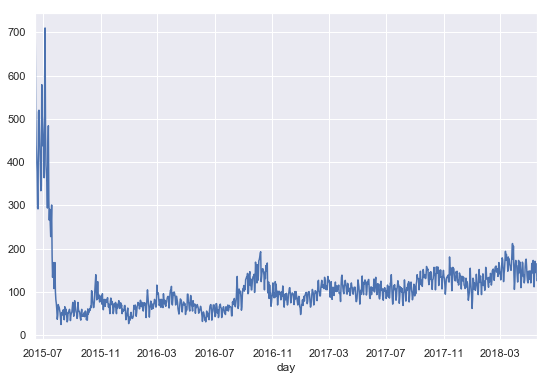

In [24]:
event_data.groupby('day').user_id.nunique().plot()

In [10]:
event_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [26]:
passed = event_data[event_data.action == 'passed']
passed.user_id.nunique()

17262

Вот тут видно, было 19234, стао 17262. Т.е. мы потеряли юзеров, который не passed ни одного теста

In [30]:
c1 = passed.groupby('user_id', as_index=False).\
    agg({'step_id':'count'}).rename(index=str, columns={'step_id':'passed_steps_count'})
c1.head()

,user_id,passed_steps_count
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84


In [13]:
c1.user_id.nunique()

17262

первый столбец не равен 19234 юзерам, т.к. мы пропустили тех, у кого никогда не было action == passed

In [36]:
event_data[event_data.user_id == 4]
# not such user_id

,step_id,timestamp,action,user_id,date,day


In [37]:
event_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [15]:
c2 = pd.pivot_table(event_data,
                    index='user_id',
                    columns='action',
                    values='step_id',                    
                    aggfunc='count')
c2.head()

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1.0,NaN,NaN,1.0
2,9.0,9.0,2.0,10.0
3,91.0,87.0,30.0,192.0
5,11.0,11.0,4.0,12.0
7,1.0,1.0,NaN,1.0


Видим в таблице NaN. Давайте заменим их на ноль.

In [16]:
c2 = event_data.pivot_table(index='user_id',
                       columns='action',
                       values='step_id',
                       aggfunc='count',
                       fill_value=0).reset_index()

In [17]:
print(event_data[event_data.user_id == 2].step_id.count())
print(event_data[event_data.user_id == 2].step_id.nunique())
event_data[event_data.user_id == 2]

30
9


,step_id,timestamp,action,user_id,date,day
2874398,32815,1514383364,discovered,2,2017-12-27 14:02:44,2017-12-27
2874399,32815,1514383364,viewed,2,2017-12-27 14:02:44,2017-12-27
2874400,32815,1514383364,passed,2,2017-12-27 14:02:44,2017-12-27
2874401,32811,1514383372,passed,2,2017-12-27 14:02:52,2017-12-27
2874402,32811,1514383372,discovered,2,2017-12-27 14:02:52,2017-12-27
2874403,32811,1514383372,viewed,2,2017-12-27 14:02:52,2017-12-27
2874410,32929,1514383396,viewed,2,2017-12-27 14:03:16,2017-12-27
2874411,32929,1514383396,discovered,2,2017-12-27 14:03:16,2017-12-27
2874412,32929,1514383397,started_attempt,2,2017-12-27 14:03:17,2017-12-27
2874413,32929,1514383420,passed,2,2017-12-27 14:03:40,2017-12-27


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1D80D190>,
      dtype=object)

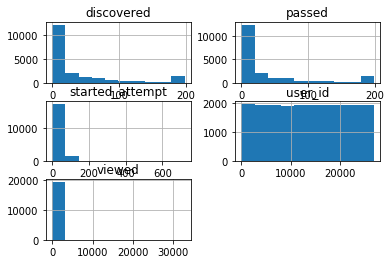

In [18]:
c2.hist()

In [19]:
c2.step_id.unique()

AttributeError: 'DataFrame' object has no attribute 'step_id'